In [47]:
%pip install numpy pandas matplotlib scikit-learn seaborn scipy statsmodels

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy

from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

Note: you may need to restart the kernel to use updated packages.


In [48]:
DATA_PATH = 'https://raw.githubusercontent.com/RFUNN/Lab/refs/heads/main/student_data.csv'

data = pd.read_csv(DATA_PATH)

In [49]:
data.head(20)

,student_id,age,gender,study_hours_per_day,social_media_hours,online_movie_view_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
5,S1005,24,Male,7.2,1.3,0.0,No,82.9,7.4,Fair,1,Master,Average,4,No,100.0
6,S1006,21,Female,5.6,1.5,1.4,Yes,85.8,6.5,Good,2,Master,Poor,4,No,89.8
7,S1007,21,Female,4.3,1.0,2.0,Yes,77.7,4.6,Fair,0,Bachelor,Average,8,No,72.6
8,S1008,23,Female,4.4,2.2,1.7,No,100.0,7.1,Good,3,Bachelor,Good,1,No,78.9
9,S1009,18,Female,4.8,3.1,1.3,No,95.4,7.5,Good,5,Bachelor,Good,10,Yes,100.0


In [50]:
data.describe()

,age,study_hours_per_day,social_media_hours,online_movie_view_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,20.501502,3.550751,2.507007,1.819119,84.129830,6.469770,3.044044,5.437437,69.605205
std,2.306597,1.469481,1.172040,1.075499,9.403768,1.226947,2.025405,2.848872,16.896616
min,17.000000,0.000000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,19.000000,2.600000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.450000
50%,20.000000,3.500000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.000000,4.500000,3.300000,2.550000,91.050000,7.300000,5.000000,8.000000,81.350000
max,24.000000,8.300000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [51]:
data.isnull().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
online_movie_view_hours           0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [52]:
data["parental_education_level"].fillna('No Data')

0           Master
1      High School
2      High School
3           Master
4           Master
          ...     
994    High School
995    High School
996       Bachelor
997       Bachelor
998       Bachelor
Name: parental_education_level, Length: 999, dtype: object

In [53]:
data.isnull().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
online_movie_view_hours           0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [54]:
data.head(20)

,student_id,age,gender,study_hours_per_day,social_media_hours,online_movie_view_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
5,S1005,24,Male,7.2,1.3,0.0,No,82.9,7.4,Fair,1,Master,Average,4,No,100.0
6,S1006,21,Female,5.6,1.5,1.4,Yes,85.8,6.5,Good,2,Master,Poor,4,No,89.8
7,S1007,21,Female,4.3,1.0,2.0,Yes,77.7,4.6,Fair,0,Bachelor,Average,8,No,72.6
8,S1008,23,Female,4.4,2.2,1.7,No,100.0,7.1,Good,3,Bachelor,Good,1,No,78.9
9,S1009,18,Female,4.8,3.1,1.3,No,95.4,7.5,Good,5,Bachelor,Good,10,Yes,100.0


In [55]:
data = data.drop(['student_id', 'age', 'online_movie_view_hours', 'attendance_percentage', 'sleep_hours', 'diet_quality', 'exercise_frequency', 'internet_quality', 'extracurricular_participation'], axis=1)

In [56]:
data.head(5)

,gender,study_hours_per_day,social_media_hours,part_time_job,parental_education_level,mental_health_rating,exam_score
0,Female,0.0,1.2,No,Master,8,56.2
1,Female,6.9,2.8,No,High School,8,100.0
2,Male,1.4,3.1,No,High School,1,34.3
3,Female,1.0,3.9,No,Master,1,26.8
4,Female,5.0,4.4,No,Master,1,66.4


In [57]:


le = LabelEncoder()

# Замена текстовых данных на числовые
data['gender'] = le.fit_transform(data['gender'])
data['mental_health_rating'] = le.fit_transform(data['mental_health_rating'])
data['part_time_job'] = le.fit_transform(data['part_time_job'])
data['parental_education_level'] = le.fit_transform(data['parental_education_level'])

In [58]:
data.head(20)

,gender,study_hours_per_day,social_media_hours,part_time_job,parental_education_level,mental_health_rating,exam_score
0,0,0.0,1.2,0,2,7,56.2
1,0,6.9,2.8,0,1,7,100.0
2,1,1.4,3.1,0,1,0,34.3
3,0,1.0,3.9,0,2,0,26.8
4,0,5.0,4.4,0,2,0,66.4
5,1,7.2,1.3,0,2,3,100.0
6,0,5.6,1.5,1,2,3,89.8
7,0,4.3,1.0,1,0,7,72.6
8,0,4.4,2.2,0,0,0,78.9
9,0,4.8,3.1,0,0,9,100.0


In [59]:
A = 0
B = 1
C = 2

data['exam_score'] = np.where(data['exam_score'] <= 65, A, data['exam_score']).astype(float)
data.loc[data['exam_score'] <= 65, 'exam_score'] = A
data.loc[(65 < data['exam_score']) & (data['exam_score'] <= 80), 'exam_score'] = B
data.loc[data['exam_score'] > 80, 'exam_score'] = C

In [60]:
data.head(5)

,gender,study_hours_per_day,social_media_hours,part_time_job,parental_education_level,mental_health_rating,exam_score
0,0,0.0,1.2,0,2,7,0.0
1,0,6.9,2.8,0,1,7,2.0
2,1,1.4,3.1,0,1,0,0.0
3,0,1.0,3.9,0,2,0,0.0
4,0,5.0,4.4,0,2,0,1.0


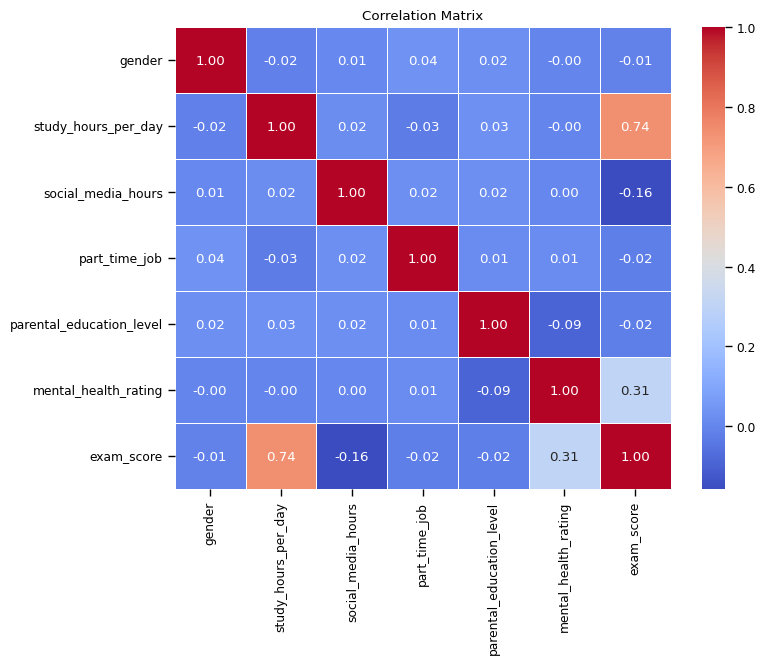

In [61]:
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


По таблице корреляции видно, что характеристика *exam_score* не коррелирует с *parental_education_level*, но коррелирует с *study_hours_per_day*

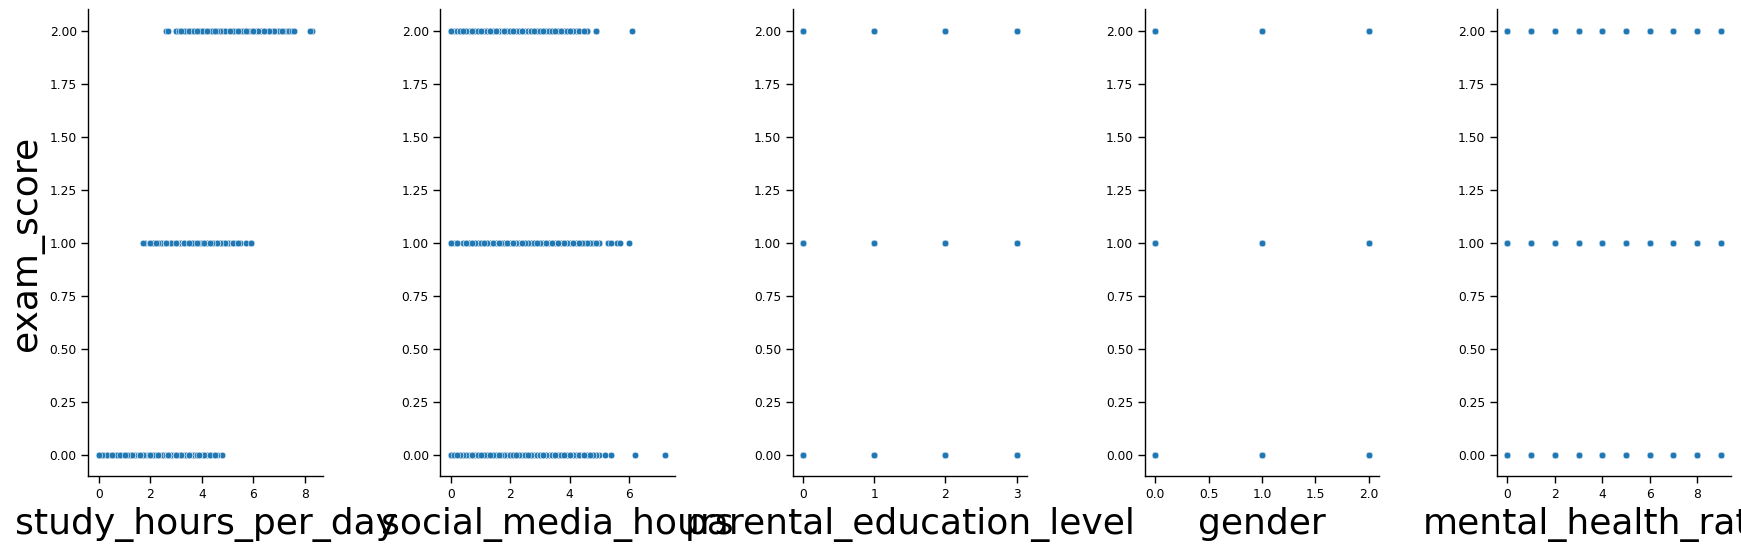

In [62]:
g = sns.pairplot(
    data,
    x_vars=["study_hours_per_day", "social_media_hours", 'parental_education_level', 'gender', 'mental_health_rating'],
    y_vars=["exam_score"],
)
for ax in g.axes.flat:
    ax.tick_params(axis='both', labelleft=True, labelbottom=True)


g.fig.set_size_inches(18,7)

plt.subplots_adjust(wspace=0.5, hspace=0.3)

sns.set_context("paper", rc={"axes.labelsize":26})


plt.show()

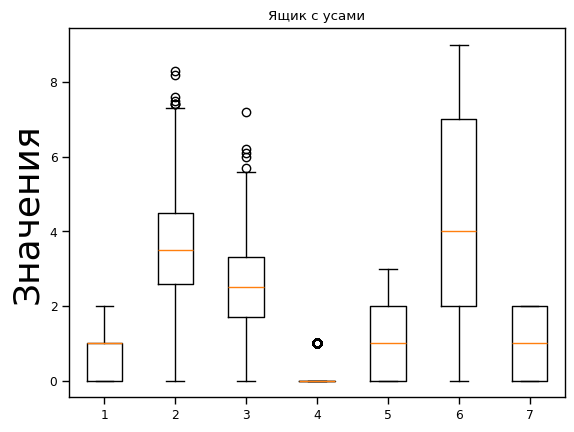

In [63]:
# Построение ящика с усами
plt.boxplot(data)
plt.ylabel('Значения')
plt.title('Ящик с усами')
plt.show()

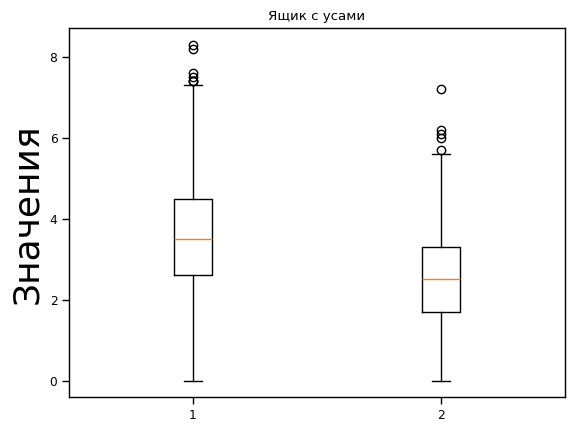

In [64]:
# Построение ящика с усами
plt.boxplot([data['study_hours_per_day'], data['social_media_hours']])
plt.ylabel('Значения')
plt.title('Ящик с усами')
plt.show()

In [65]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

# Detect outliers
outliers = detect_outliers_iqr(data['study_hours_per_day'])

In [66]:
data_cleaned = data[~outliers]

In [67]:
# Detect outliers
outliers = detect_outliers_iqr(data_cleaned['social_media_hours'])
data_cleaned = data_cleaned[~outliers]

In [68]:
data_cleaned.head(10)
print(len(data_cleaned['gender']), len(data_cleaned['study_hours_per_day']))

987 987


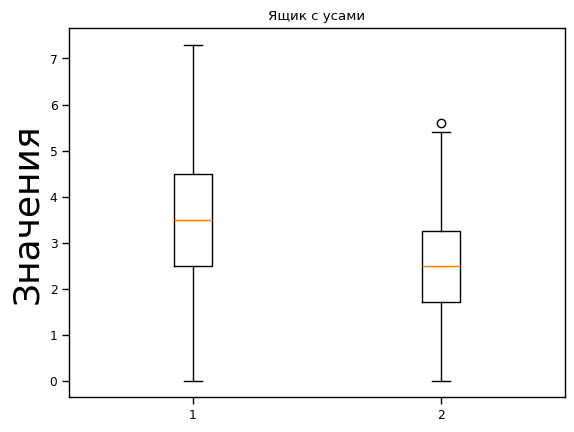

In [69]:
# Построение ящика с усами
plt.boxplot([data_cleaned['study_hours_per_day'], data_cleaned['social_media_hours']])
plt.ylabel('Значения')
plt.title('Ящик с усами')
plt.show()

In [70]:
correlation_matrix = data_cleaned.corr()
print(correlation_matrix['exam_score'])

gender                     -0.010064
study_hours_per_day         0.739671
social_media_hours         -0.166194
part_time_job              -0.022795
parental_education_level   -0.016132
mental_health_rating        0.305357
exam_score                  1.000000
Name: exam_score, dtype: float64


In [71]:
def cost_function(X, y, theta):
    m = y.size
    error = np.dot(X, theta.T) - y
    cost = 1/(2*m) * np.dot(error.T, error)
    return cost, error

In [72]:
def gradient_descent(X, y, theta, alpha, iters):
    cost_array = np.zeros(iters)
    m = y.size
    for i in range(iters):
        cost, error = cost_function(X, y, theta)
        theta = theta - (alpha * (1/m) * np.dot(X.T, error))
        cost_array[i] = cost
    return theta, cost_array


In [73]:
def plotChart(iterations, cost_num):
    fig, ax = plt.subplots()
    ax.plot(np.arange(iterations), cost_num, 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title('Error vs Iterations')
    plt.style.use('fivethirtyeight')
    plt.show()

# нормализуем

data = (data - data.mean()) / data.std()
data.head()

In [74]:
# Extract data into X and y
X = data_cleaned[['study_hours_per_day', 'social_media_hours', 'mental_health_rating']]
y = data_cleaned['exam_score']
y

0      0.0
1      2.0
2      0.0
3      0.0
4      1.0
      ... 
994    0.0
995    1.0
996    0.0
997    1.0
998    1.0
Name: exam_score, Length: 987, dtype: float64

In [75]:
model = LinearRegression()
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [76]:
model.coef_, model.intercept_

(array([ 0.41654098, -0.12398889,  0.08796648]),
 np.float64(-0.6612760162381983))

In [77]:
student_data = [2.9, 1.0, 6]
np.sum(model.coef_ * student_data) + model.intercept_ 

np.float64(0.9505027994591488)

In [78]:
df = pd.DataFrame(X)
df['y'] = y
df['pred_fit'] = [round(el) for el in model.predict(X)]
df['pred_dot'] = X.dot(model.coef_) + model.intercept_

df.head()

,study_hours_per_day,social_media_hours,mental_health_rating,y,pred_fit,pred_dot
0,0.0,1.2,7,0.0,0,-0.194297
1,6.9,2.8,7,2.0,2,2.481453
2,1.4,3.1,0,0.0,0,-0.462484
3,1.0,3.9,0,0.0,-1,-0.728292
4,5.0,4.4,0,1.0,1,0.875878


In [79]:
df['residural'] = df['pred_fit'] - df['y']
df.head(20)

,study_hours_per_day,social_media_hours,mental_health_rating,y,pred_fit,pred_dot,residural
0,0.0,1.2,7,0.0,0,-0.194297,0.0
1,6.9,2.8,7,2.0,2,2.481453,0.0
2,1.4,3.1,0,0.0,0,-0.462484,0.0
3,1.0,3.9,0,0.0,-1,-0.728292,-1.0
4,5.0,4.4,0,1.0,1,0.875878,0.0
5,7.2,1.3,3,2.0,2,2.440533,0.0
6,5.6,1.5,3,2.0,2,1.749270,0.0
7,4.3,1.0,7,1.0,2,1.621627,1.0
8,4.4,2.2,0,1.0,1,0.898729,0.0
9,4.8,3.1,9,2.0,2,1.745453,0.0


In [80]:
np.mean(df['residural'] ** 2) ## ошибка MSE

np.float64(0.2938196555217832)

In [81]:
# создание стобца для внедрения весов
X = np.column_stack([X, np.ones((len(X)))])
X

array([[0. , 1.2, 7. , 1. ],
       [6.9, 2.8, 7. , 1. ],
       [1.4, 3.1, 0. , 1. ],
       ...,
       [3. , 2.6, 8. , 1. ],
       [5.4, 4.1, 0. , 1. ],
       [4.3, 2.9, 7. , 1. ]])

$$MSE = \frac1n \sum_{i = 1}^{n} (y_i - X_i w)^2 $$

$$ \frac{\partial MSE}{\partial w} = \frac2n (Y - Xw) \cdot (-X) $$

In [82]:
def ErrorMSE(X, w, y):
    y_pred = X @ w
    return np.sum((y - y_pred)**2) / len(y_pred)

def GradientErrorMSE(X, w, y):
    y_pred = X @ w
    return 2 / len(X) * (y - y_pred) @ (-X)

In [83]:
weights = np.zeros(X.shape[1])
weights # 3 для признака, 1 для свободного коэф-та

array([0., 0., 0., 0.])

In [94]:
dWeights = 0.00001

learning_rate = 0.005

next_weights = weights

N = 100000

for i in range(N):
    cur_weights = next_weights
    next_weights = cur_weights - learning_rate * GradientErrorMSE(X, cur_weights, y)
    print(GradientErrorMSE(X, cur_weights, y))
    print(f"Iter: {i}, Текущая точка: {cur_weights}, Следующая точка: {next_weights}")
    print(f"Целевая точка:{model.coef_} {model.intercept_}")
    print(f"MSE: {ErrorMSE(X, cur_weights, y)}\n")

    if np.linalg.norm(cur_weights - next_weights, ord=2) <= dWeights:
        break    

[-7.95238095 -4.10536981 -9.26443769 -1.77507599]
Iter: 0, Текущая точка: [0. 0. 0. 0.], Следующая точка: [0.0397619  0.02052685 0.04632219 0.00887538]
Целевая точка:[ 0.41654098 -0.12398889  0.08796648] -0.6612760162381983
MSE: 1.4305977710233029

[-4.93715647 -2.03517923 -4.92138729 -0.96459574]
Iter: 1, Текущая точка: [0.0397619  0.02052685 0.04632219 0.00887538], Следующая точка: [0.06444769 0.03070275 0.07092912 0.01369836]
Целевая точка:[ 0.41654098 -0.12398889  0.08796648] -0.6612760162381983
MSE: 0.7706013868792564

[-3.24438582 -0.88330338 -2.51840552 -0.51235912]
Iter: 2, Текущая точка: [0.06444769 0.03070275 0.07092912 0.01369836], Следующая точка: [0.08066962 0.03511926 0.08352115 0.01626015]
Целевая точка:[ 0.41654098 -0.12398889  0.08796648] -0.6612760162381983
MSE: 0.559671497292054

[-2.28755806 -0.24224899 -1.19354101 -0.2593964 ]
Iter: 3, Текущая точка: [0.08066962 0.03511926 0.08352115 0.01626015], Следующая точка: [0.09210741 0.03633051 0.08948886 0.01755714]
Целева

In [98]:
student_data = [2.9, 1.0, 6]
score_pred = np.sum(next_weights[:-1] * student_data) + next_weights[-1] 

EXAM_SCORES = [A, B, C]
EXAM_STUD = B

print(f"Ожидание: {EXAM_STUD}")
print(f"Предсказание: {score_pred}")

print(f"Модель: {next_weights}")

Ожидание: 1
Предсказание: 0.9545682792826597
Модель: [ 0.41481203 -0.1259182   0.08742033 -0.6469904 ]


https://www.geeksforgeeks.org/machine-learning/interpreting-the-results-of-linear-regression-using-ols-summary/

https://ru.python-3.com/?p=3622

https://colab.research.google.com/drive/1Sh7SStUHCLS2Fiz0nrHJ3icGUIofPTH-?invite=CJDm5osD#scrollTo=qfUy8CGd2VVF

https://habr.com/ru/companies/otus/articles/752434/

https://habr.com/ru/articles/684580/

https://madewithml.com/courses/foundations/pandas/

https://www.geeksforgeeks.org/python/python-pandas-dataframe-fillna-to-replace-null-values-in-dataframe/

https://www.geeksforgeeks.org/python/how-to-delete-only-one-row-in-csv-with-python/

https://www.geeksforgeeks.org/data-analysis/working-with-missing-data-in-pandas/

https://www.geeksforgeeks.org/data-analysis/how-to-replace-values-in-column-based-on-condition-in-pandas/

https://youtu.be/KJA9A1q9l7E?si=1c54m7-qchea48O0